In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# read data

In [3]:
data=pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# check missing values

In [7]:
# total charge should be a numerics
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<Axes: >

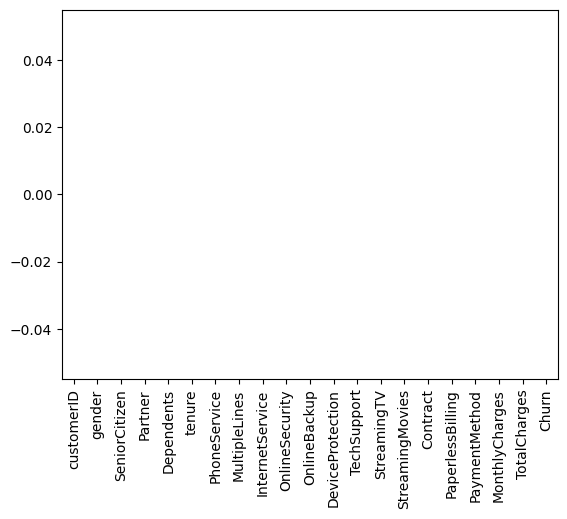

In [8]:
data.isnull().sum().plot(kind='bar')

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#cleaning total charge
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].isnull().sum()/len(data['TotalCharges'])

0.001561834445548772

In [10]:
# a small set so can afford to remove
data = data.dropna()

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# initial data observation

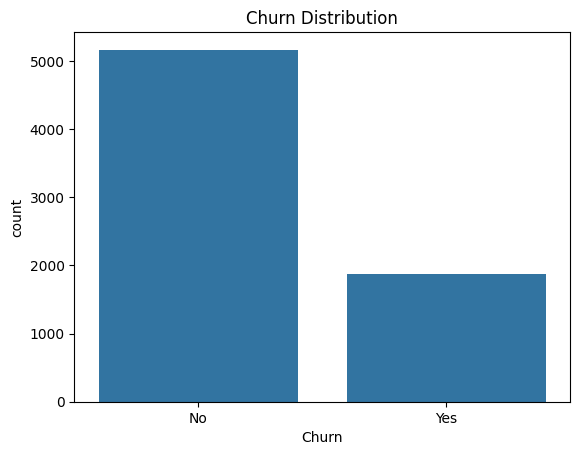

<Axes: >

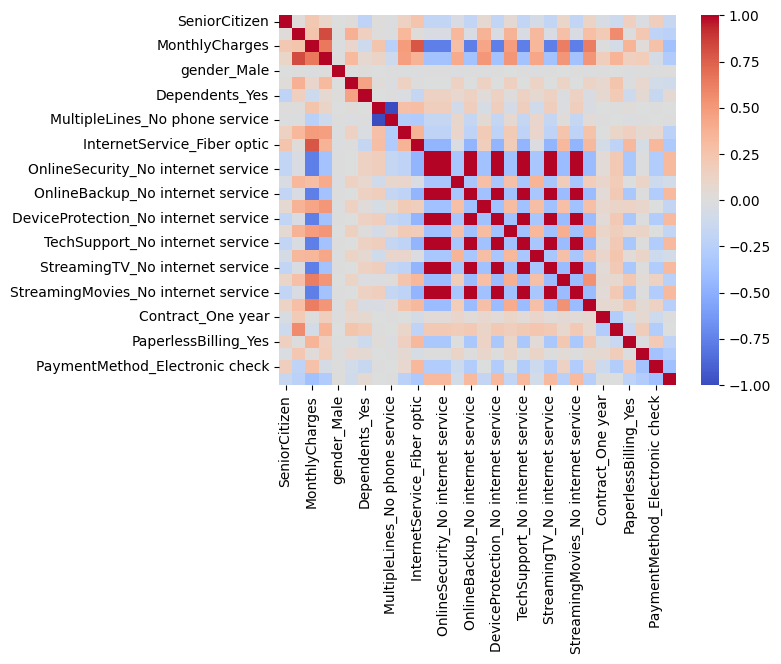

In [32]:
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

sns.heatmap(feature_data.corr(), cmap='coolwarm', annot=False)

# creating dummies

In [18]:
features = list(data.columns)
features.remove('customerID')
features.remove('Churn')
feature_data = pd.get_dummies(data[features],drop_first =True, dtype=int)

# Normalization

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(feature_data)
y = data['Churn'].map(lambda x:1 if x =='Yes' else 0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Logistic regression

1. the model fits well, with 80% accuracy

In [26]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [27]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8081023454157783


<Axes: >

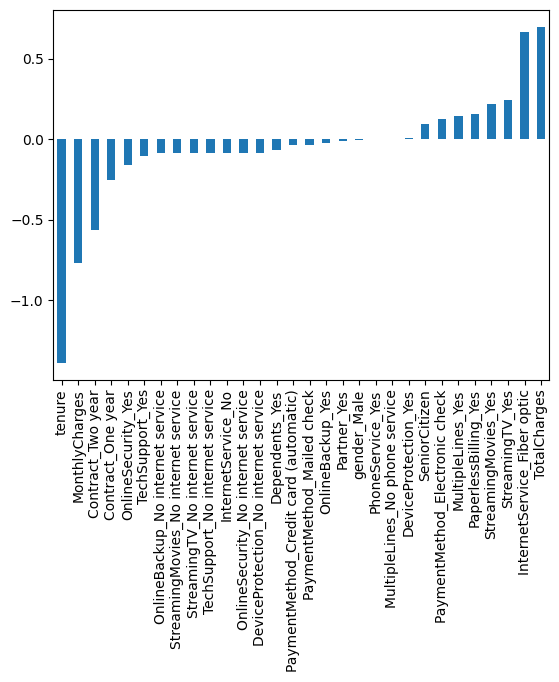

In [28]:
pd.Series(lr.coef_[0],index = feature_data.columns).sort_values().plot(kind='bar')

In [29]:
coef = pd.DataFrame({
    'Feature': feature_data.columns,
    'Coefficient': lr.coef_[0],
    'OddsRatio': np.exp(lr.coef_[0])
}).sort_values(by='OddsRatio', ascending=False)

<Axes: xlabel='Feature'>

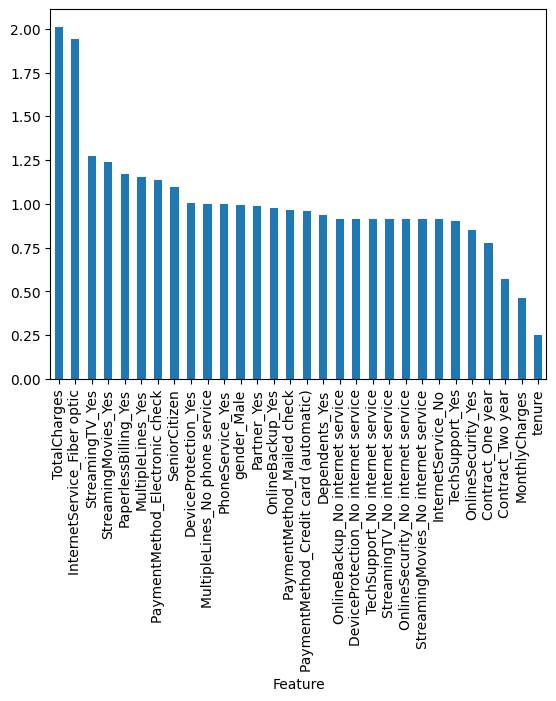

In [31]:
coef.set_index('Feature')['OddsRatio'].plot(kind='bar')

# Summary
1. total charge, internetservice fiber optic and the tenure, contract are the most dominant factors
    the higher the charge, the more likely people will leavel
    the longer the tenure, the less likely people will leave
    having 2y contract will have 50% lower odds to leave than having monthly contract